# Volume 2: The Discrete Fourier Transform
    Derek Robinson
    Math 345
    11/24/2025

In [4]:
from IPython.display import display
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
from matplotlib import pyplot as plt

In [69]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12, 3)      # Change plot size / aspect (you may adjust this).

In [80]:

class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.
        
        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples
        

    # Problems 1 and 7
    def plot(self, should_we_dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""

        duration = len(self.samples) / self.rate
        time = np.linspace(0, duration, len(self.samples))
        if should_we_dft:

            
            dft_result = fft(self.samples)
            n = len(dft_result)
            k = np.arange(n)
            frequencies = k * self.rate / n
            magnitudes = np.abs(dft_result)
            half_n = n // 2
            freq_half = frequencies[:half_n]
            mag_half = magnitudes[:half_n]
            
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
            ax1.plot(frequencies, magnitudes)
            ax1.set_title("sound wave - frequency")
            ax1.set_xlabel("frequency")
            ax1.set_ylabel("mag")


            ax2.plot(freq_half, mag_half)
            ax2.set_title("sound wave (dft)")
            ax2.set_xlabel("frequency")
            ax2.set_ylabel("magnitude")
            plt.tight_layout()

            plt.savefig("sound_wave_with_dft.png")
            
        else:
            plt.figure(figsize=(10, 4))
            plt.plot(time, self.samples)
            plt.title("sound wave")
            plt.xlabel("times seconds")
            plt.ylabel("amplitude")
            plt.savefig("sound_wave.png")

    # Problem 2

    def export(self, filename, force=False):
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        #change to np.array and check if scaling is needed
        samples = np.array(self.samples)
        needs_scaling = (samples.dtype != np.int16) or force
        
        if needs_scaling:

            #we have to do floats and complex
            if samples.dtype.kind in "fc":
                samples_normalized = np.clip(samples, -1.0, 1.0)
                scaled_samples = (samples_normalized * 32767).astype(np.int16)
            else: 
                #is an int
                max_val = np.max(np.abs(samples))
                if max_val >= 0:
                    scale_factor = 32767 / max_val
                    scaled_samples = (samples * scale_factor).astype(np.int16)
                else:
                    scaled_samples = samples.astype(np.int16)

            samples_to_export = scaled_samples
        #maybe we dont need to do
        else:
            samples_to_export = samples
        
        wavfile.write(filename, self.rate, samples_to_export)
        
    # Problem 4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        if len(self.samples) != len(other.samples):
            raise ValueError("sample arrays must be of th esame elngth to add")
        combined_samples = self.samples + other.samples
        return SoundWave(self.rate, combined_samples)

    # Problem 4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if self.rate != other.rate:
            raise ValueError("samples must match to concatenate")
        concatenated_samples = np.concatenate([self.samples, other.samples])
        return SoundWave(self.rate, concatenated_samples)

## Problem 1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use SciPy's `wavfile.read()` and the `SoundWave` class to plot `tada.wav` in the cell below.

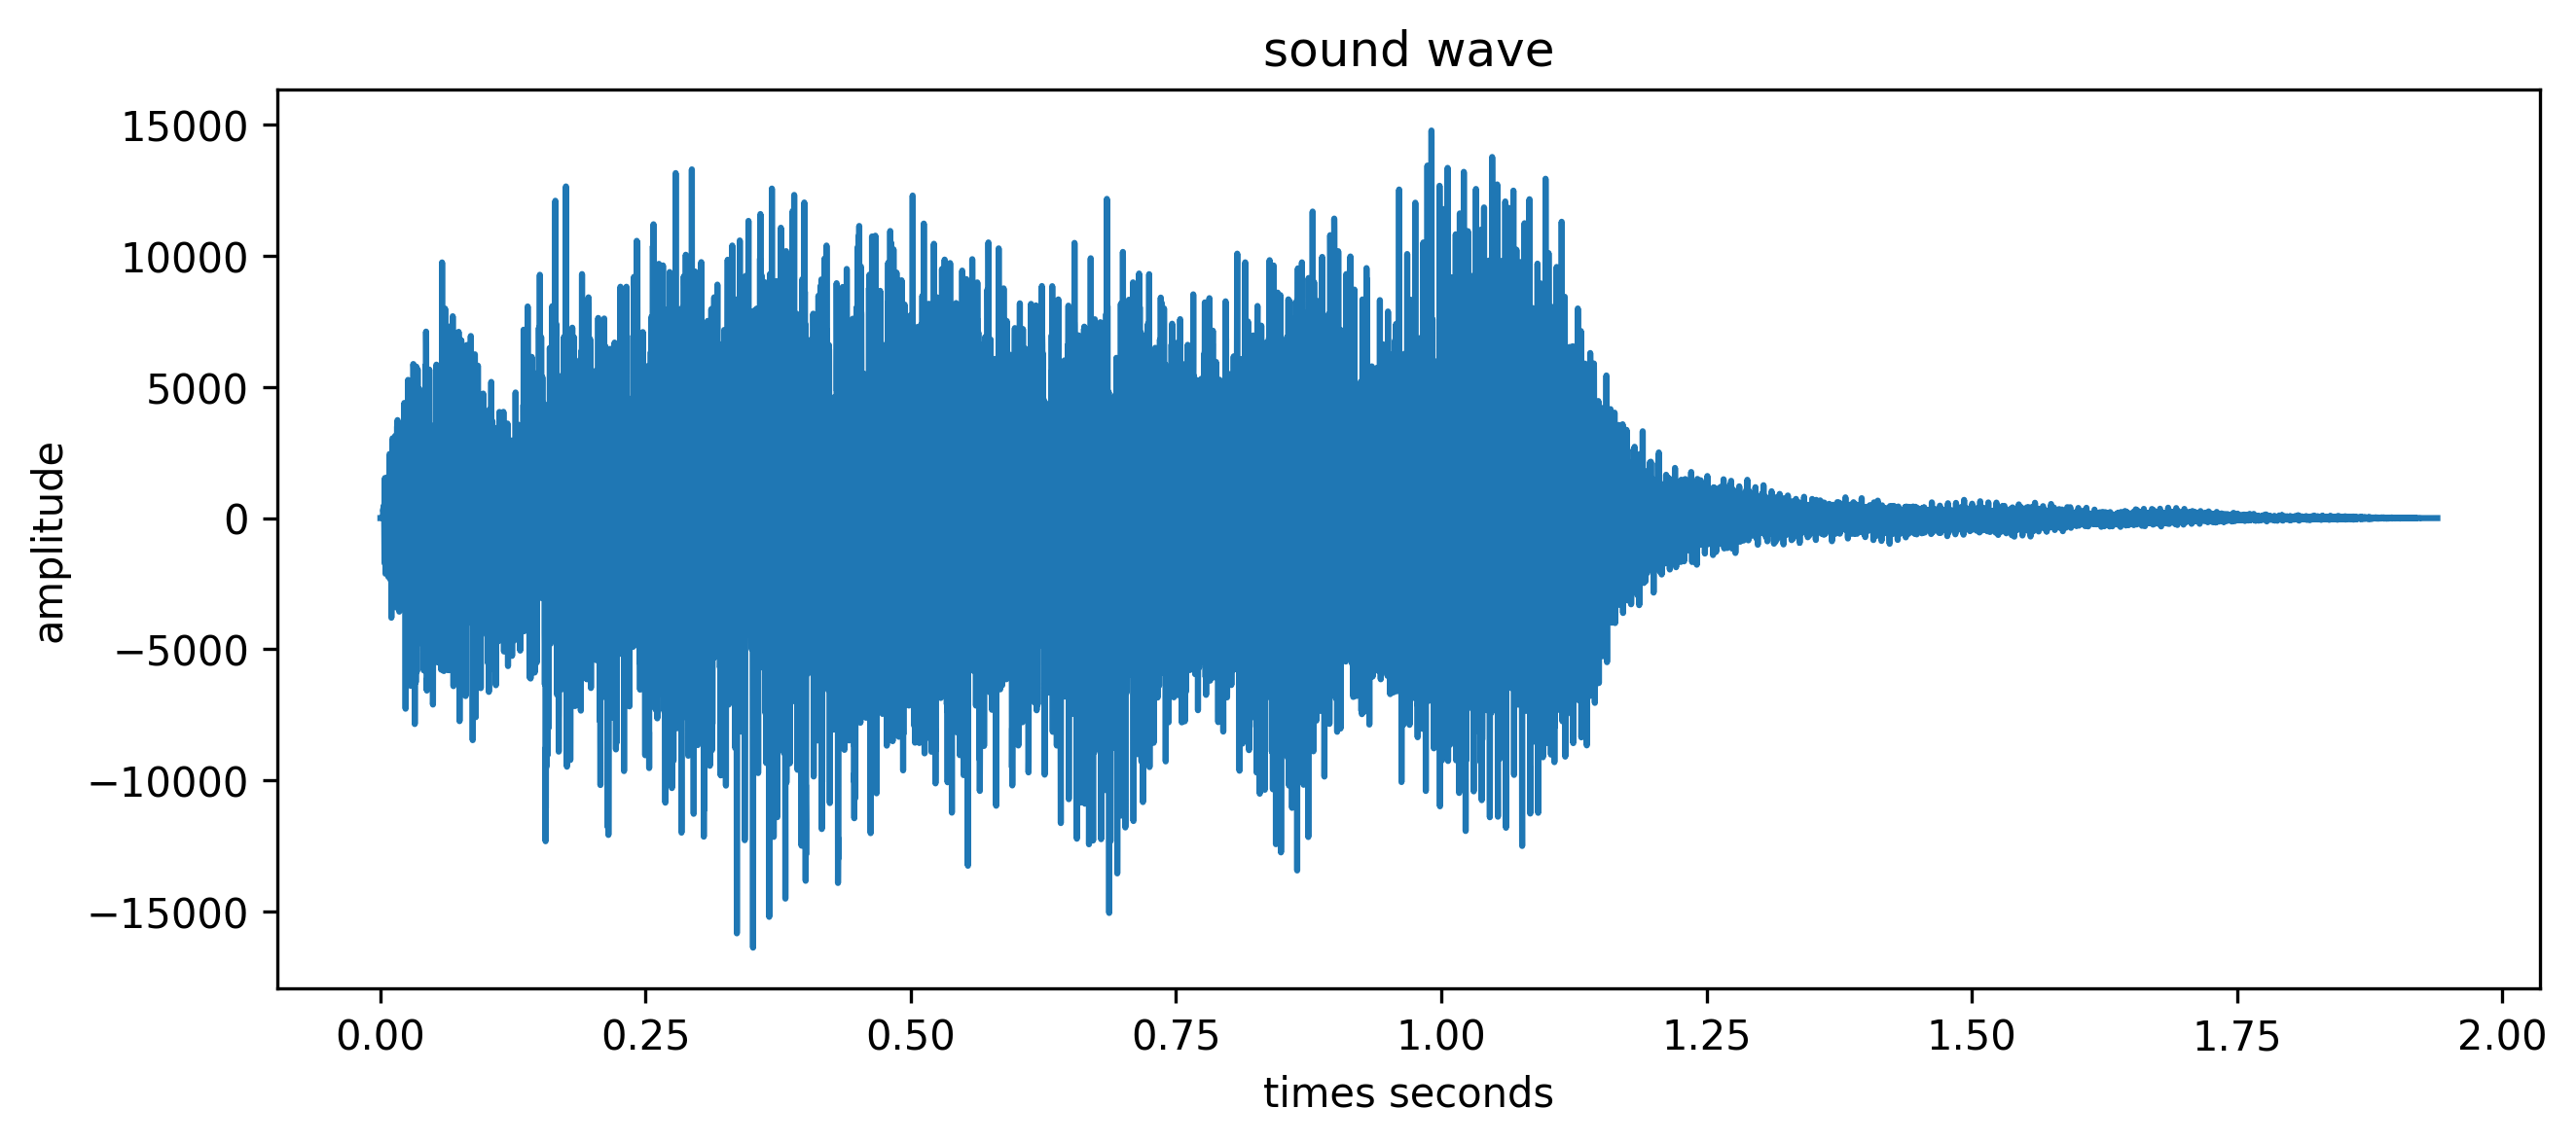

In [7]:
sample_rate, audio_data = wavfile.read("tada.wav")
tada_sound = SoundWave(sample_rate, audio_data)
tada_sound.plot()

## Problem 2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and two new versions of `tada.wav` in the cells below.

In [21]:

tada_sound.export("tada_scaled.wav", force=True)

# Create the unscaled file (done earlier)
tada_sound.export("tada_no_scale.wav")



display(IPython.display.Audio("tada.wav"))
display(IPython.display.Audio("tada_no_scale.wav"))
display(IPython.display.Audio("tada_scaled.wav"))


## Problem 3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the cell below.

In [68]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    sample_rate = 44100
    num_samples = int(sample_rate * duration)
    time = np.linspace(0, duration, num_samples, endpoint=False)
    amplitude = np.array(np.sin(2 * np.pi * frequency * time))

    return SoundWave(sample_rate, amplitude)

## Problem 4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the first cell below.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A &rarr; C &rarr; E, where each tone lasts one second, and embed it in the second cell below.

In [33]:
A1 = generate_note(440, 1)
C1 = generate_note(523.25, 1)
E1 = generate_note(659.25, 1)

A_minor_arpeggio = A1 >> C1 >> E1
A_minor_arpeggio.export("a_minor_arpeggio.wav")


## Problem 5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- In the cell below, use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [ ]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    #nparray
    samples = np.asarray(samples)
    n = samples.size
    #vector indices
    k = np.arange(n)
    #want it to be a col vect
    t = k.reshape((n, 1))
    #dft mat (t* k is array broasting so 4x1 by 4 does each row in col vector by the 1 row in the other one, works for dft mat making)
    F = np.exp(-2j * np.pi * t * k / n)/n
    return F @ samples

In [46]:
x = np.random.rand(8)
c1 = simple_dft(x)
n = x.size
c2 = fft(x) 
print(np.allclose(c1, c2))

True


## Problem 6

- Implement `simple_fft()`.
- In the cell below:
    - Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
    - Print the runtimes of each computation.
    - Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [64]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    #following algorithm
    def split(g):
        n = len(g)
        #naive for small
        if n <= threshold:
            return simple_dft(g)
        else:
            even = split(g[::2])
            
            odd = split(g[1::2])

            z = np.zeros(n, dtype=np.complex128)
            
            for k in range(n):
                z[k] = np.exp(-2j * np.pi * k / n)
            factor = np.exp(-2j * np.pi * np.arange(n) / n)
            m = n // 2
            X = np.concatenate([even + factor[:m] * odd, 
                               even + factor[m:] * odd])
            return X
    #im guessing I dont need ot normalize 2x
    return split(samples)
    

In [66]:
x = np.random.rand(8)
c1 = simple_dft(x)
c2 = simple_fft(x)

print("DFT", c1)
print("FFT", c2)
print("closed", np.allclose(c1, c2))

DFT [ 4.24981953+0.00000000e+00j -0.31849902-5.43972878e-01j
 -0.12955402+1.00982545e+00j -1.4328255 +1.25547755e-01j
 -0.45897801-3.59808316e-16j -1.4328255 -1.25547755e-01j
 -0.12955402-1.00982545e+00j -0.31849902+5.43972878e-01j]
FFT [ 4.24981953+0.00000000e+00j -0.31849902-5.43972878e-01j
 -0.12955402+1.00982545e+00j -1.4328255 +1.25547755e-01j
 -0.45897801-2.88330692e-16j -1.4328255 -1.25547755e-01j
 -0.12955402-1.00982545e+00j -0.31849902+5.43972878e-01j]
closed True


## Problem 7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of the A tone from Problem 4 the first cell below.
- Display the plot of the DFT of the A minor chord from Problem 4 in the second cell below.

a tone dft - should peak at 440


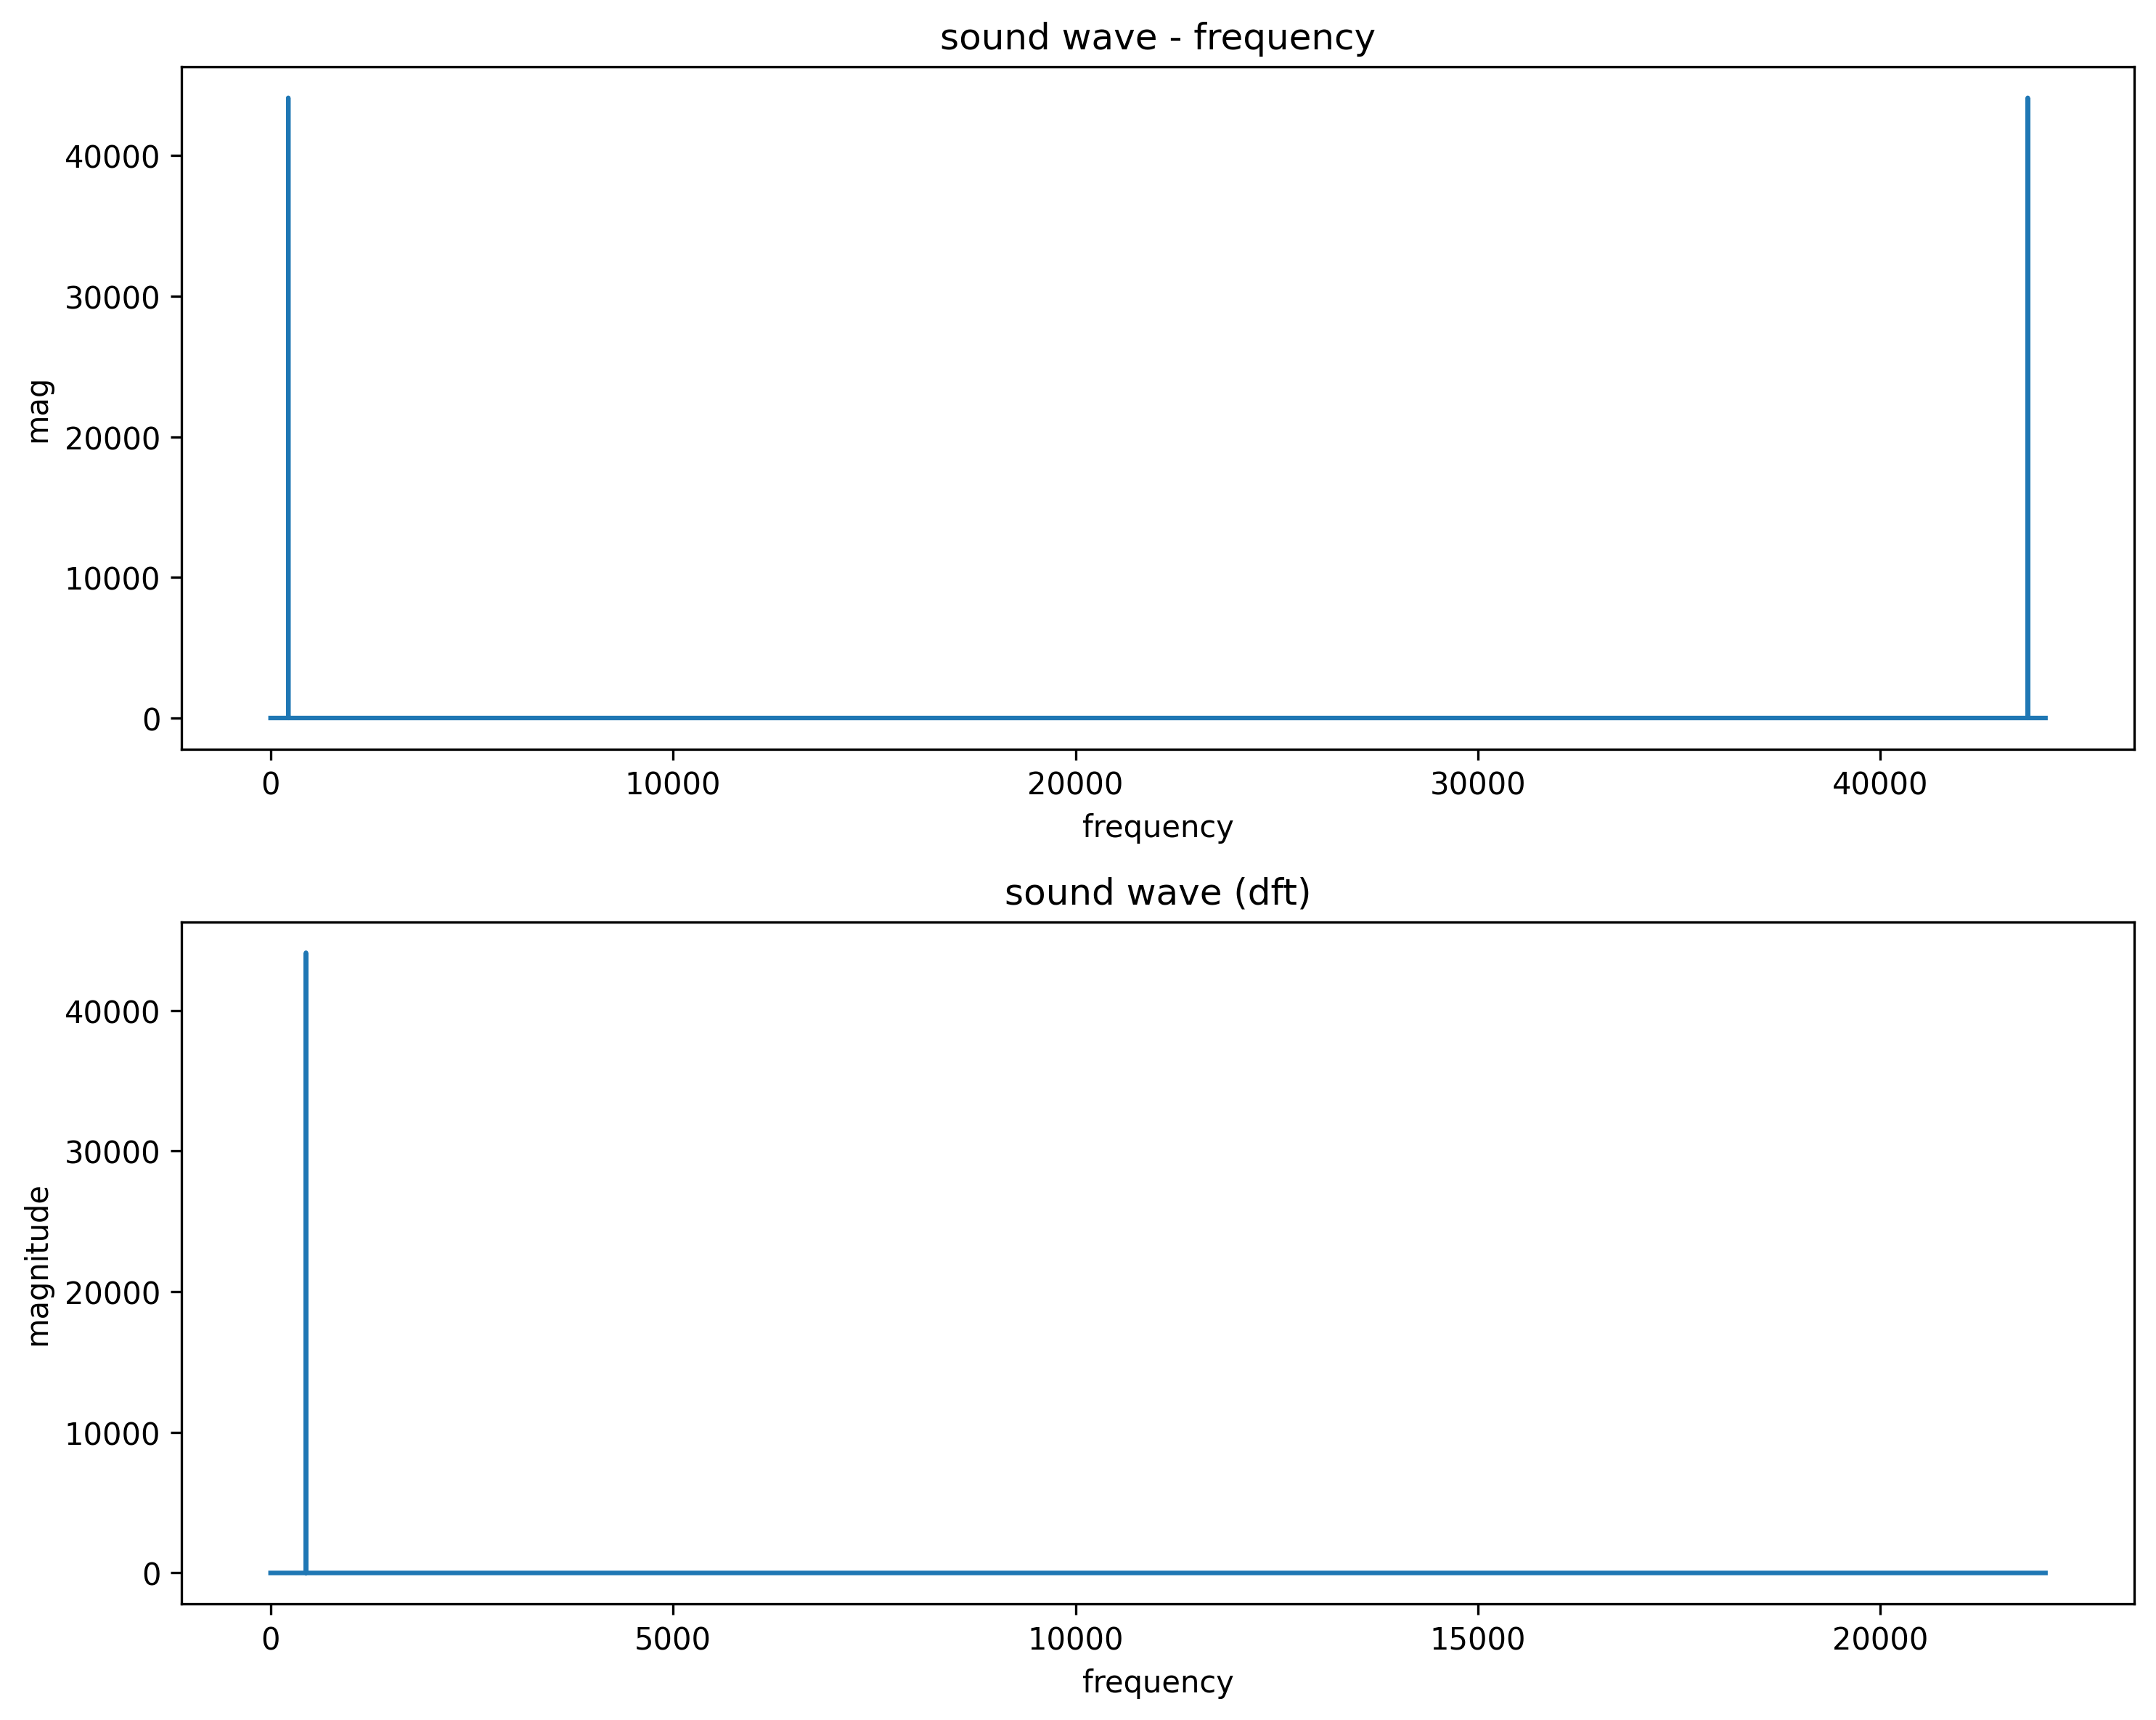

In [81]:
a_tone = generate_note(440, 2)
print("a tone dft - should peak at 440")
a_tone.plot(should_we_dft=True)

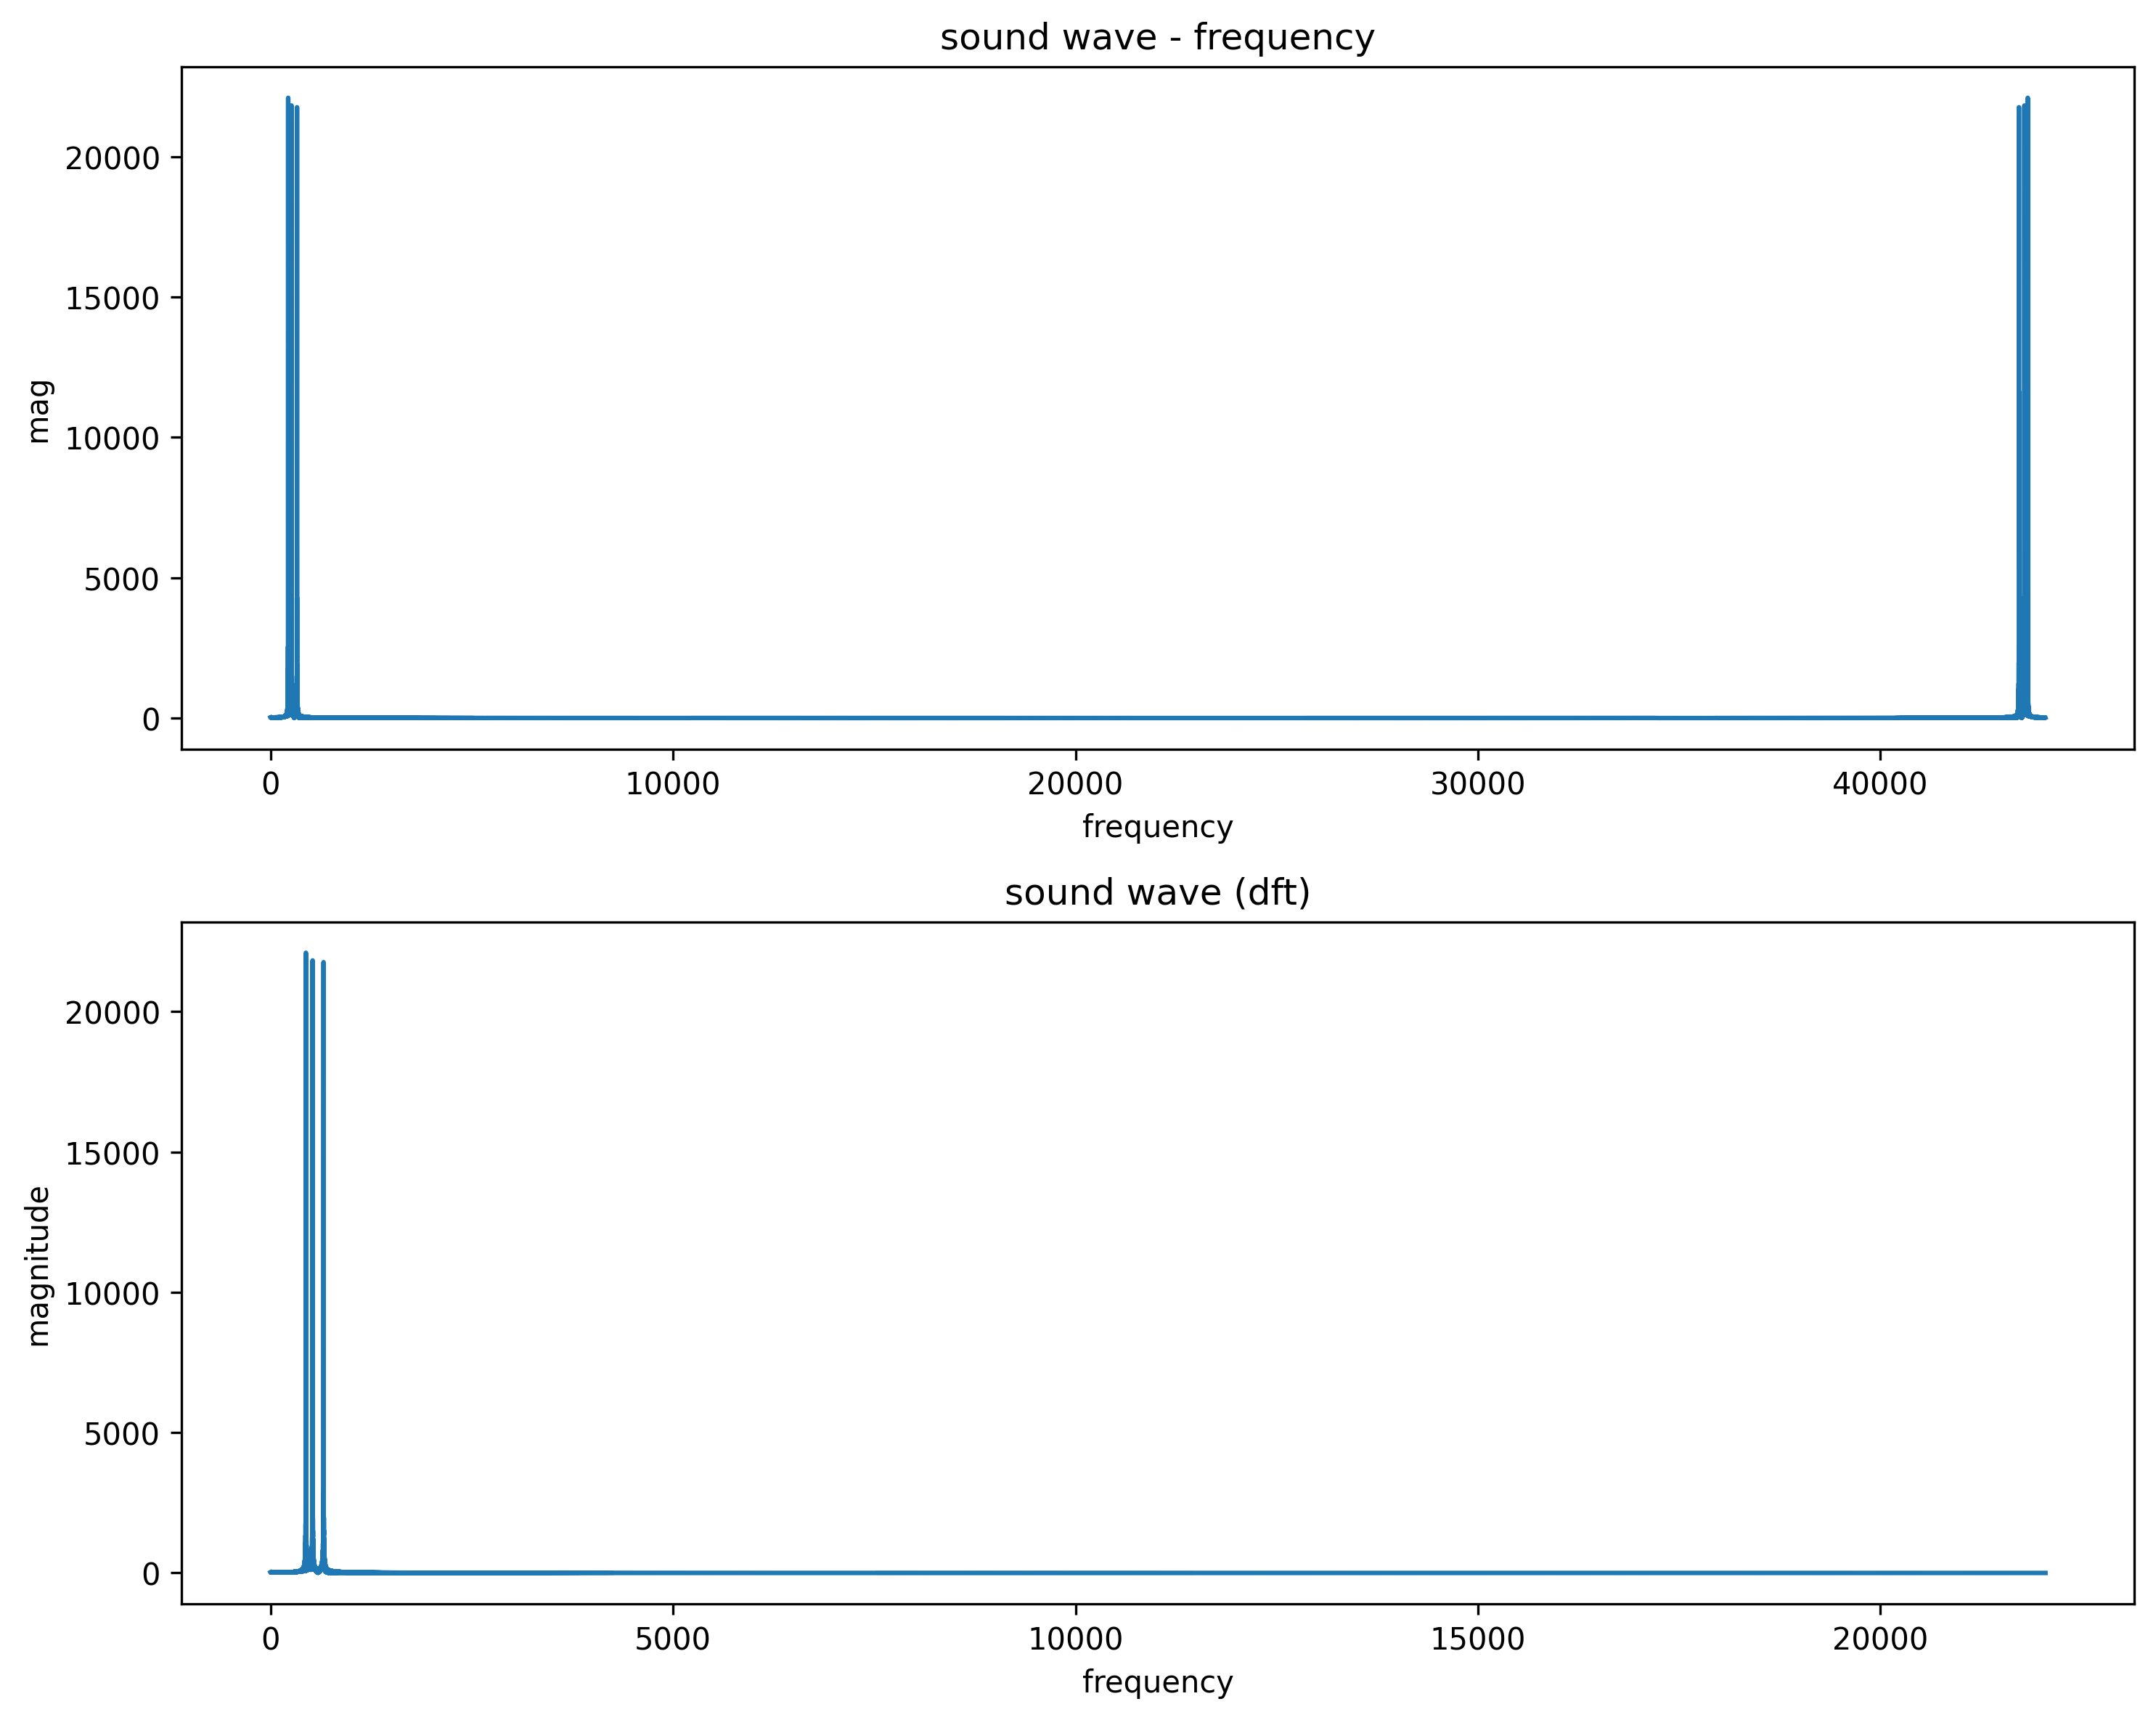

In [89]:

A1 = generate_note(440, 1)
C1 = generate_note(523.25, 1)
E1 = generate_note(659.25, 1)
A_minor_arpeggio = A1 >> C1 >> E1
A_minor_arpeggio.plot(should_we_dft=True)


## Problem 8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

In [93]:
rate, samples = wavfile.read("mystery_chord.wav")
#fft
dft_result = fft(samples)
#magnitudes of complex nums
magnitudes = np.abs(dft_result)
#gets the last 5 indices and then has to revers
top5_indices = np.argsort(magnitudes)[-5:][::-1]
#this gives all freqs
freqs = np.fft.fftfreq(len(samples), 1/rate)
top5_freqs = np.abs(freqs[top5_indices])

print("Top 5 frequencies (Hz):", top5_freqs)

Top 5 frequencies (Hz): [440.   440.   784.   784.   523.25]


The notes are...
C G A